In [ ]:
# --- Lorenz-like "bee path" simulation and plot (Jupyter-ready) ---

import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 - ensures 3D projection is registered

In [ ]:


# ------------------------
# 1) Parameters & system
# ------------------------
a = 10.0     # often called sigma
b = 28.0     # often called rho
c = 2.667    # often called beta

def system(t, state):
    """dx/dt, dy/dt, dz/dt for the Lorenz system variant."""
    x, y, z = state
    dx = a * (y - x)
    dy = b * x - y - x * z
    dz = x * y - c * z
    return [dx, dy, dz]

Saved plot to:
  outputs\lorenz_bee_20250812_231949.png
  outputs\lorenz_bee_20250812_231949.svg


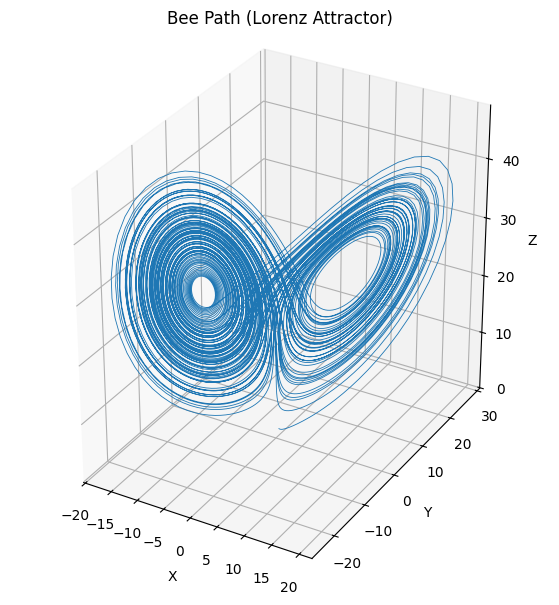

In [1]:


# ------------------------
# 2) Initial conditions & time grid
# ------------------------
x0, y0, z0 = 0.0, 1.0, 1.05
state0 = [x0, y0, z0]

t_start, t_end = 0.0, 100.0
t_eval = np.linspace(t_start, t_end, 10001)  # high-resolution sampling

# ------------------------
# 3) Integrate ODEs
# ------------------------
sol = solve_ivp(
    fun=system,
    t_span=(t_start, t_end),
    y0=state0,
    t_eval=t_eval,
    method="RK45",     # default Runge-Kutta; you can try "DOP853" for higher-order
    rtol=1e-7,
    atol=1e-9
)

if not sol.success:
    raise RuntimeError(f"ODE solver failed: {sol.message}")

x, y, z = sol.y

# ------------------------
# 4) Plot in 3D
# ------------------------
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, lw=0.6)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Bee Path (Lorenz Attractor)")

# Nice equal-ish aspect for 3D:
try:
    ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))
except Exception:
    pass

# ------------------------
# 5) Save the figure
# ------------------------
os.makedirs("outputs", exist_ok=True)
ts = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
png_path = os.path.join("outputs", f"lorenz_bee_{ts}.png")
svg_path = os.path.join("outputs", f"lorenz_bee_{ts}.svg")

fig.savefig(png_path, dpi=300, bbox_inches="tight")  # high-res raster
fig.savefig(svg_path, bbox_inches="tight")           # scalable vector

print("Saved plot to:")
print(" ", png_path)
print(" ", svg_path)

plt.show()
